# Preprocessing

---

#### Preprocessing steps:

1. Handle duplicate images
2. Split dataset to training, validation and testing datasets
3. Prepare image data using the DataFrame from EDA

---
## Imports

In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from pathlib import Path
import sys
sys.path.append('../')

from utils.duplicates import remove_rows, get_duplicates_to_delete, visualize_duplicates

AUTOTUNE = tf.data.experimental.AUTOTUNE

In [2]:
# Read dataframes saved from EDA
df = pd.read_csv('../data/processed/csv/df.csv')
duplicates = pd.read_csv('../data/processed/csv/duplicates.csv')

--- 
## 1. Handle duplicates

### Automatically delete:
- For each duplicate group, delete all but one rows marked as "Duplicate" for each "Style".
- Outputs "df_no_dup".

In [1]:
# Scan duplicates
duplicates_to_delete = get_duplicates_to_delete(duplicates)

# Remove duplicates
recommend_df = remove_rows(df, duplicates_to_delete)
recommend_df.shape

NameError: name 'get_duplicates_to_delete' is not defined

In [4]:
from pathlib import Path

# Save the no duplicates DataFrame
rec_csv_dir = Path('../data/recommend/csv')
rec_csv_dir.mkdir(parents=True, exist_ok=True)
recommend_df.to_csv(rec_csv_dir / 'rec_df.csv', index=False)

### Manually delete:
- Any rows marked as "Inspect" that belongs in the wrong "Class".
- Overwrite "df", as this DataFrame will continue to be used for further preprocessing.

In [5]:

inspects = duplicates[duplicates['Duplicate_Type'] == 'Inspect']
total_inspect_groups = inspects["Group"].nunique(dropna=False)
inspects

,Group,Duplicate_Type,Path,Type,Width,Height,Ratio,Mode,Class,Style,Hash
226,112,Inspect,tables/Craftsman/28467craftsman-dressers.jpg,jpg,350,350,1.0,RGB,tables,Craftsman,fbea6ebbd105a451cd78b1ccae23cb8492f195ae1d2312...
227,112,Inspect,beds/Craftsman/4866craftsman-bed.jpg,jpg,350,350,1.0,RGB,beds,Craftsman,fbea6ebbd105a451cd78b1ccae23cb8492f195ae1d2312...
501,247,Inspect,dressers/Farmhouse/34120farmhouse-buffets-and-...,jpg,350,350,1.0,RGB,dressers,Farmhouse,8bfa4afe3c256aadd100341fc042955a70b5cb41947de6...
502,247,Inspect,tables/Farmhouse/28763farmhouse-console-tables...,jpg,350,350,1.0,RGB,tables,Farmhouse,8bfa4afe3c256aadd100341fc042955a70b5cb41947de6...
521,257,Inspect,tables/Modern/11484modern-dressers.jpg,jpg,350,350,1.0,RGB,tables,Modern,f3bbad52dccc13b9cc659725921158ce2dd594a5931146...
522,257,Inspect,dressers/Modern/2146modern-dressers.jpg,jpg,350,350,1.0,RGB,dressers,Modern,f3bbad52dccc13b9cc659725921158ce2dd594a5931146...
864,418,Inspect,lamps/Contemporary/4023contemporary-table-lamp...,jpg,350,350,1.0,RGB,lamps,Contemporary,eafeb034e0503af5815123e195eb27439faac54ade84c7...
865,418,Inspect,tables/Modern/10363modern-nightstands-and-beds...,jpg,350,350,1.0,RGB,sofas,Contemporary,b3980ddb3c66d39bd098f3a70c182c66c39ff068c99734...
906,439,Inspect,sofas/Midcentury/3928midcentury-sofas.jpg,jpg,350,350,1.0,RGB,sofas,Midcentury,faea345da114d33097304aaa157fc8efc0dccbbcc728ad...
907,439,Inspect,chairs/Transitional/22571transitional-indoor-c...,jpg,350,350,1.0,RGB,sofas,Transitional,faea34dda114d33097304aaa157fc8efc0dccbbcc728ad...


In [6]:
# Delete one of each pair

# Only delete very different class ("tables" and "beds"). Similar classes are kept ("chairs" and "sofas")
inspects_rows_to_delete = ['beds/Craftsman/4866craftsman-bed.jpg', 'tables/Modern/10363modern-nightstands-and-bedside-tables.jpg']

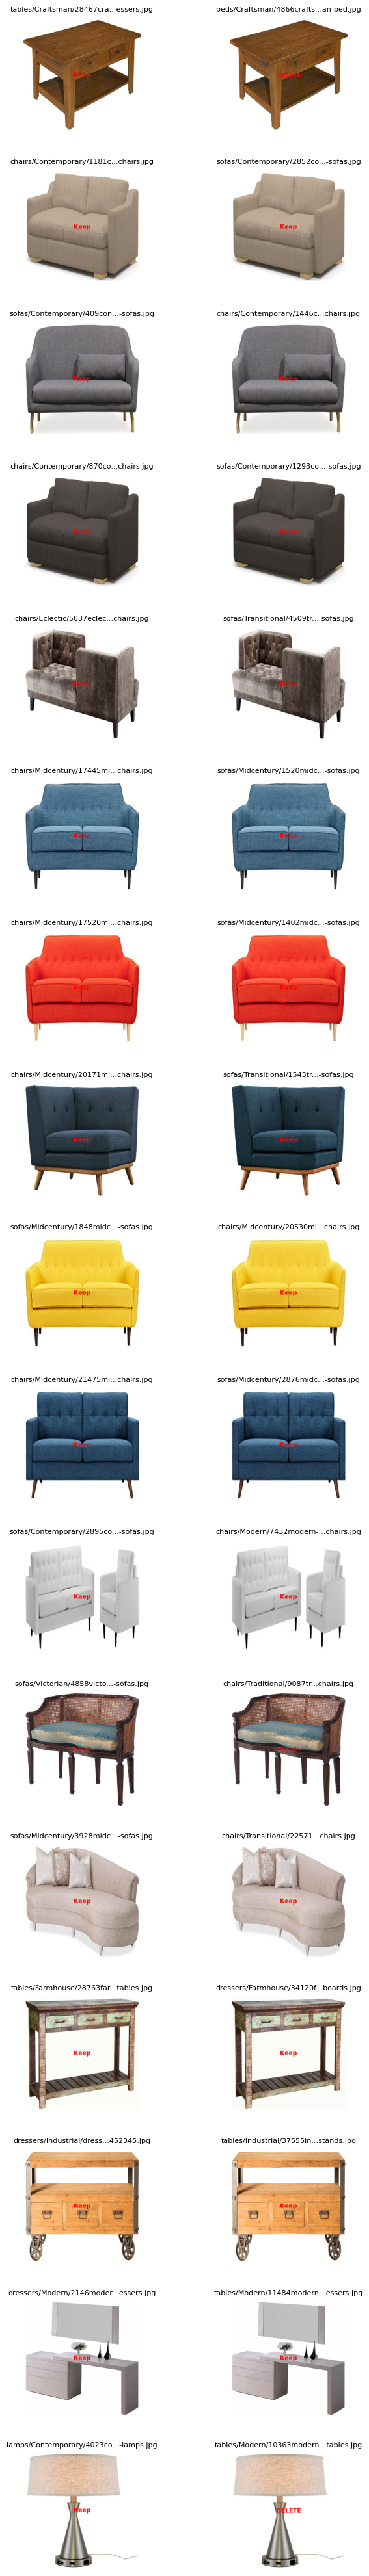

In [7]:
inspect_review = inspects.copy()
inspect_review["Duplicate_Type"] = "Keep"

inspect_review.loc[inspect_review['Path'].isin(inspects_rows_to_delete), "Duplicate_Type"] = "DELETE"
visualize_duplicates(inspect_review, total_inspect_groups)

In [8]:
inspects_to_delete = inspect_review[inspect_review["Duplicate_Type"] == "DELETE"]
inspects_to_delete

,Group,Duplicate_Type,Path,Type,Width,Height,Ratio,Mode,Class,Style,Hash
227,112,DELETE,beds/Craftsman/4866craftsman-bed.jpg,jpg,350,350,1.0,RGB,beds,Craftsman,fbea6ebbd105a451cd78b1ccae23cb8492f195ae1d2312...
7035,3332,DELETE,tables/Modern/10363modern-nightstands-and-beds...,jpg,350,350,1.0,RGB,tables,Modern,b3980ddb3c66d39bd098f3a70c182c66c39ff068c99734...


In [9]:
df = remove_rows(df, inspects_to_delete)
df.head()

Removing rows...


,Path,Type,Width,Height,Ratio,Mode,Class,Style
0,beds/Asian/19726asian-daybeds.jpg,jpg,350,350,1.0,RGB,beds,Asian
1,beds/Asian/20027asian-canopy-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
2,beds/Asian/20109asian-panel-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
3,beds/Asian/20508asian-platform-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
4,beds/Asian/20750asian-comforters-and-comforter...,jpg,350,350,1.0,RGB,beds,Asian


### Prepare DataFrame

- Mark duplicates images for augmentation later

In [10]:
# Merge the two DataFrames based on the "Path" column
merged_df = pd.merge(df, duplicates_to_delete[['Path']], on='Path', how='left', indicator=True)

# Create the "Duplicate_Type" column based on the merge indicator
merged_df['Duplicate_Type'] = merged_df['_merge'].map({'both': "Duplicate", 'left_only': "Unique"})

# Drop the merge indicator column
merged_df = merged_df.drop('_merge', axis=1)

# Update the original "df" with the new "Duplicate_Type" column
df = merged_df

---
## 2. Split (train, validation, test)

In [11]:
train_data = df.copy()

train_X, test_X = train_test_split(
    train_data,
    test_size=0.2,
    random_state=42
)
train_X, val_X = train_test_split(
    train_X,
    test_size=0.25,
    random_state=42
)

print(f"Train: {train_X.shape[0]}\n"
      f"Validation: {val_X.shape[0]}\n"
      f"Test: {test_X.shape[0]}")

Train: 54048
Validation: 18016
Test: 18017


--- 
## Store

In [12]:
%store train_X
%store val_X
%store test_X

Stored 'train_X' (DataFrame)
Stored 'val_X' (DataFrame)
Stored 'test_X' (DataFrame)


In [13]:
# Create paths
processed_csv_dir = Path('../data/processed/csv')
processed_csv_dir.mkdir(parents=True, exist_ok=True)

train_X.to_csv(processed_csv_dir / 'train_X.csv', index=False)
val_X.to_csv(processed_csv_dir / 'val_X.csv', index=False) # Original DataFrame
test_X.to_csv(processed_csv_dir / 'test_X.csv', index=False) # Original DataFrame

---

## 3. Prepare image data using the DataFrame from EDA
## Guide for model notebooks

#### <span style="color:red">Use the code below at the beginning of model notebooks</span>

Using Tensorflow for quick normalization and rescaling*

Import <span style="color:yellow">'from utils.tensorflow_preprocessing import prepare_image_target_dataset'<span>

---

### LOAD DATAFRAMES

In [ ]:
# # LOAD DATASETS
# dataset_path = '../data/processed/csv'
# 
# train_X = pd.read_csv(f"{dataset_path}/train_X.csv")
# val_X = pd.read_csv(f"{dataset_path}/val_X.csv")
# test_X = pd.read_csv(f"{dataset_path}/test_X.csv")
# 
# print(f"train_X.shape: {train_X.shape}, val_X.shape: {val_X.shape}, test_X.shape: {test_X.shape}")

---
### PREPARE DATASETS

```prepare_image_target_dataset(df, target_name, img_height, img_width, batch_size, base_path, label_encoder)```

- **Description:** Load the images from the paths from the DataFrame
- **Return**: Tensorflow.Dataset object
- **Functions**
  - Resize *(default = 256x256 pixels)*
  - Augment *(flip, color jitter)* <span style="color:green">only to the images marked as duplicates</span>
  - Rescale and Normalization *(RGB values -> range(0, 1))*
  - Label encoding / One-hot encoding
  - Set batch size for dataset *(default = 32)*

**Note:** Set the parameter ```target_name``` to the following values

- For Task 1 and Taske 2: set to "Class" for Label Encoding
- For Task 3: set to "Style" for One Hot Encoding

In [14]:
# # TASK 1 AND 2
# train_class_ds, class_encoder = prepare_image_target_dataset(train_X, target_name="Class")
# val_class_ds, _ = prepare_image_target_dataset(val_X, target_name="Class", label_encoder=class_encoder)
# test_class_ds, _ = prepare_image_target_dataset(test_X, target_name="Class", label_encoder=class_encoder)
# 
# # TASK 3
# train_style_ds, style_encoder = prepare_image_target_dataset(train_X, target_name="Style")
# val_style_ds, _ = prepare_image_target_dataset(val_X, target_name="Style", label_encoder=style_encoder)
# test_style_ds, _ = prepare_image_target_dataset(test_X, target_name="Style", label_encoder=style_encoder)
# 
# 
# rec_ds = prepare_image_dataset(df_no_dup)